## 0. Simulate dataset (*)
# Simulate datasets according to these rules:
* ### set random seed to 42
* ### (1000,2) samples from  𝑋∼$\mathcal{U}$(0,1)  , i.e. 1000 rows, 2 columns.
* ### 1000 samples from  $\epsilon \sim N$(0,1) 
* ### 𝑦=3𝑥1+5𝑥2+3+𝜖  , where  𝑥𝑖  is column  𝑖  of  𝑋 
* ### Finally add a column of ones for the intercept to  𝑋 .

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
samples = 1000

X = np.random.rand(samples, 2)
Epsilon = np.random.normal(0, 1, size=(samples, 2)) # mean 0, std 1

#print(X.shape)

print(f"The dimensions for X array is: {X.ndim}D") # Property if it is which type of array it is

# X_1_indice = X[:, 0]    # Choose first rows first column
# X_2_indice =X[:, 1]  # Choose all rows second column

y = 3 * X[:, 0] + 5 * X[:, 1] + 3 + np.sum(Epsilon, axis=1)    #X[:, 0] Choose all first rows in the first column, # X[:, 1] Choose all rows in the second column

print(y.shape, Epsilon.shape, X.shape)

y = y.reshape(-1, 1) # Ger y dimensioner så den inte är tom i höger ledet (1000,)

X = np.c_[np.ones(samples), X]


print(f"y shape {y.shape}")
print(f"X shape {X.shape}")
X[:5]

The dimensions for X array is: 2D
(1000,) (1000, 2) (1000, 2)
y shape (1000, 1)
X shape (1000, 3)


array([[1.        , 0.37454012, 0.95071431],
       [1.        , 0.73199394, 0.59865848],
       [1.        , 0.15601864, 0.15599452],
       [1.        , 0.05808361, 0.86617615],
       [1.        , 0.60111501, 0.70807258]])

## 1. Gradient descent - learning rate (*)
* ### Use gradient descent to calculate  𝜃⃗=(𝜃0,𝜃1,𝜃2)𝑇 
  ### a) Use  𝜂=0.1  and calculate  𝜃⃗  for each fifth epoch from 1 to 500. So the procedure is as follows:
* ### calculate 𝜃⃗  for epochs = 1
* ### calculate  𝜃⃗  for epochs = 6
* ### ...
* ### calculate  𝜃⃗  for epochs = 496
* ### Plot these  𝜃⃗  values against epochs. (*)
*  ### b) Do the same as for a) but with learning rate  𝜂=0.01 , 5000 epochs and for each 20th epoch. What do you notice when changing the learning rate? (*)
*  ### c) Experiment with larger and smaller  𝜂  and see what happens.

In [2]:
# Vi ska kalkylera gradient descent
def gradient_descent(X, y, learning_rate=0.1, epochs=500):
    m = len(X)

    theta = np.random.randn(X.shape[1], 1)

    for _ in range(epochs):
        # Gradient
        gradient = 2 / m * X.T @ (X @ theta - y)
        # Update theta "Decay"
        theta -= learning_rate * gradient

        return theta

theta = gradient_descent(X, y)
theta

array([[ 1.62360114],
       [ 3.14782472],
       [-1.07756619]])

In [3]:
# Train | test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape



((670, 3), (330, 3), (670, 1), (330, 1))

In [4]:
epoch_list = []
theta_1list = []
theta_2list = []
theta_3list = []


for epoch in range(1,500,5):
    theta_1,theta_2,theta_3 = gradient_descent(X_train,y_train,learning_rate=.1,epochs=epoch).flatten()
    epoch_list.append(epoch)
    theta_1list.append(theta_1)
    theta_2list.append(theta_2)
    theta_3list.append(theta_3)

df = pd.DataFrame({"epochs":epoch_list,"theta1":theta_1list,"theta2":theta_2list,"theta3":theta_3list})

df.head()

,epochs,theta1,theta2,theta3
0,1,1.310869,1.348849,0.893540
1,6,1.427359,-0.458436,1.101767
2,11,0.902309,-1.274097,2.108265
3,16,2.150959,0.695823,0.920491
4,21,2.157463,0.811407,1.528462


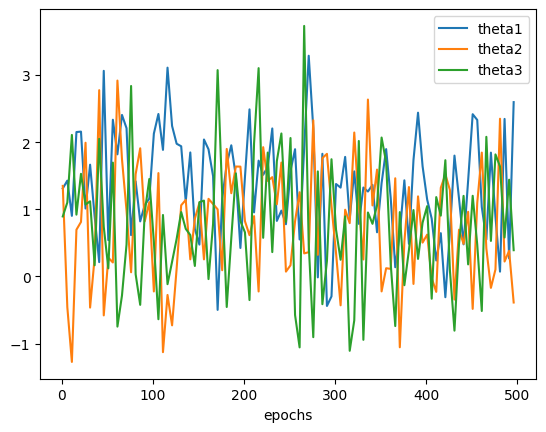

In [6]:
ax = plt.gca()

df.plot( kind='line',x='epochs',y='theta1',ax=ax)
df.plot( kind='line',x='epochs',y='theta2',ax=ax)
df.plot( kind='line',x='epochs',y='theta3',ax=ax)

plt.show()

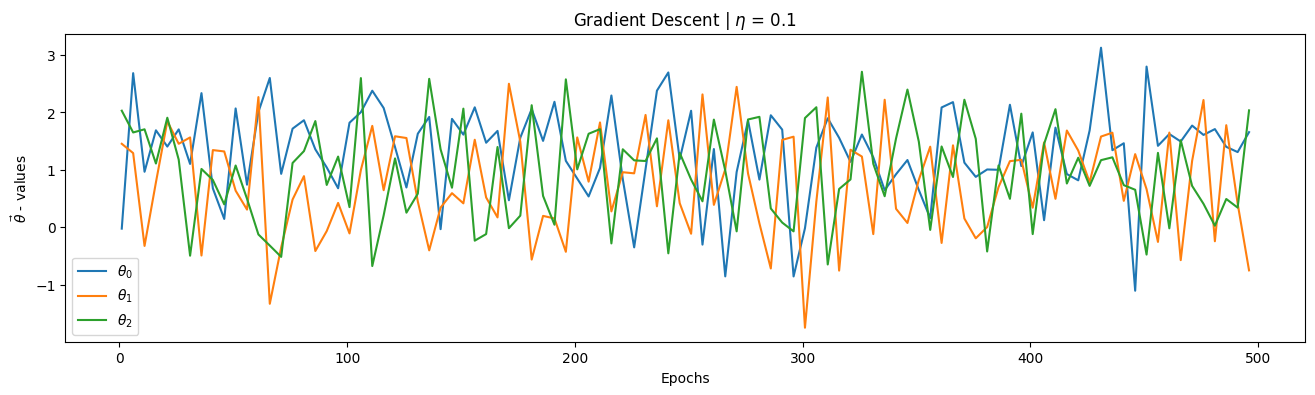

In [ ]:
# a)

steps = range(1, 500, 5) # Jumping 5 steps every iteration (For each fifth epoch 1-500)
thetas = np.array(
    [gradient_descent(X, y, epochsi=epoch, learning_rate=0.1).reshape(-1) for epoch in steps]
)
thetas = np.array(thetas)

# # Plotting a graph
plt.figure(figsize=(16,4))
plt.plot(steps, thetas)
plt.title(r"Gradient Descent | ${\eta}$ = 0.1")
plt.ylabel(r"$\vec{\theta}$ - values")
plt.xlabel("Epochs")
plt.gca().legend((r"${\theta_0}$", r"${\theta_1}$", r"${\theta_2}$"));
